In [3]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# importing dataset with date as index
df = pd.read_csv(r"C:\Git\Time-Series-Forecasting\Data\raw\SNPTSX.csv")

In [5]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-10-16,12298.099609,12412.200195,12232.099609,12407.700195,12407.700195,150614400
1,2012-10-17,12423.700195,12463.299805,12396.700195,12461.299805,12461.299805,194273200
2,2012-10-18,12425.500000,12494.000000,12425.000000,12466.099609,12466.099609,154959500
3,2012-10-19,12437.900391,12465.000000,12372.900391,12416.000000,12416.000000,163589600
4,2012-10-22,12362.700195,12430.500000,12340.400391,12403.500000,12403.500000,155419800


In [6]:
df['Date'] = pd.to_datetime(df['Date']) # convert the Date column type
df.set_index('Date', inplace=True) # setting the Date as index of the data frame
df = df.asfreq('d') # setting index freq as daily

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3651 entries, 2012-10-16 to 2022-10-14
Freq: D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2509 non-null   float64
 1   High       2509 non-null   float64
 2   Low        2509 non-null   float64
 3   Close      2509 non-null   float64
 4   Adj Close  2509 non-null   float64
 5   Volume     2509 non-null   float64
dtypes: float64(6)
memory usage: 199.7 KB


In [7]:
# filling missing value by interpolating between nearest 2 nearest points
for i in df.columns:
    df[i] = df[i].interpolate(option='linear')    

In [8]:
df.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3651.000000,3651.000000,3651.000000,3651.000000,3651.000000,3.651000e+03
mean,15783.190292,15845.749710,15709.464516,15780.685977,15780.685977,2.104085e+08
std,2402.001619,2407.044019,2394.389019,2401.198749,2401.198749,8.687975e+07
min,11657.299805,11870.599609,11172.700195,11228.500000,11228.500000,0.000000e+00
25%,14239.666504,14326.516765,14185.350097,14259.766602,14259.766602,1.652524e+08
50%,15379.099609,15439.766927,15324.199951,15383.799805,15383.799805,2.021128e+08
75%,16537.299805,16566.699219,16480.850586,16519.049805,16519.049805,2.446545e+08
max,22109.699219,22213.099609,22045.199219,22087.199219,22087.199219,9.440374e+08


# Time Series Visualization

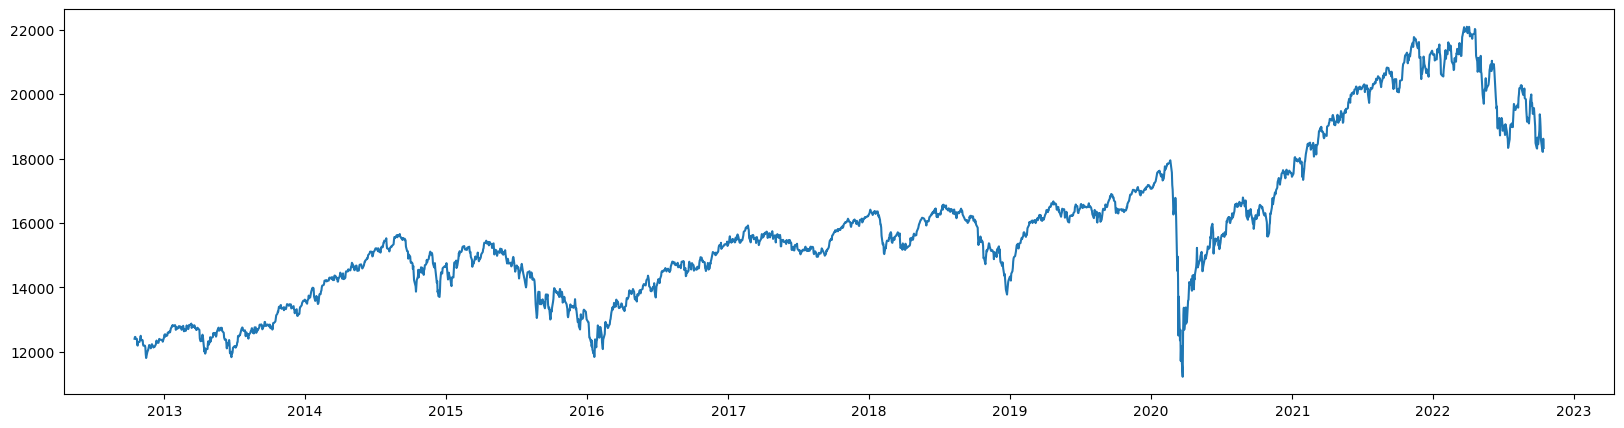

In [10]:
plt.figure(figsize=(20,5))
plt.plot(df['Adj Close'])

The data shows an overall upward trend except 2015-16 fall due to oil price decline, 2020 crash due to Covid-19 and 2022 decline due to Ukraine-Russia war.

For further studies date till 2018-12-31 is considered.

In [11]:
# trim dataset
#df = df.loc['2012-10-16':'2018-12-31']
df = df.loc['2016-01-01':'2017-01-31']
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 2016-01-01 to 2017-01-31
Freq: D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       397 non-null    float64
 1   High       397 non-null    float64
 2   Low        397 non-null    float64
 3   Close      397 non-null    float64
 4   Adj Close  397 non-null    float64
 5   Volume     397 non-null    float64
dtypes: float64(6)
memory usage: 21.7 KB


In [12]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-27,15614.700195,15648.200195,15543.500000,15575.799805,15575.799805,1.625118e+08
2017-01-28,15591.166666,15613.500000,15484.566732,15518.899740,15518.899740,1.756164e+08
2017-01-29,15567.633138,15578.799804,15425.633463,15461.999674,15461.999674,1.887211e+08
2017-01-30,15544.099609,15544.099609,15366.700195,15405.099609,15405.099609,2.018257e+08
2017-01-31,15393.000000,15421.799805,15313.000000,15386.000000,15386.000000,2.506454e+08


In [13]:
df.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2017-01-22', '2017-01-23', '2017-01-24', '2017-01-25',
               '2017-01-26', '2017-01-27', '2017-01-28', '2017-01-29',
               '2017-01-30', '2017-01-31'],
              dtype='datetime64[ns]', name='Date', length=397, freq='D')

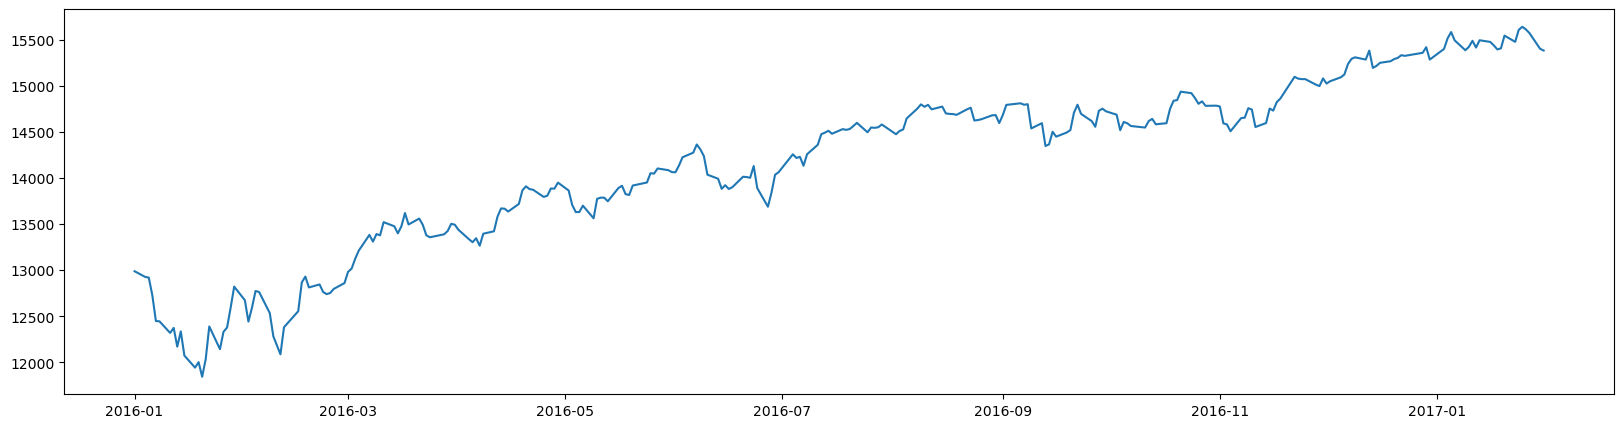

In [14]:
plt.figure(figsize=(20,5))
plt.plot(df['Adj Close'])

# Dense Neural Networks


In [35]:
# importing required packages
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [92]:
# converting to log > differncing > numpy array
df_log = np.log(df["Adj Close"])
df_log_diff = df_log - df_log.shift()

index = np.array(df["Adj Close"])
#index = np.array(df_log)
#index = np.array(df_log_diff)

In [121]:
# instantiating time series generator
seq_length = 1
generator = TimeseriesGenerator(index[:250], index[:250], length = seq_length, batch_size = 1)
generator_origin = TimeseriesGenerator(index[250:], index[250:], length = seq_length, batch_size = 1)

In [122]:
# defining sequential model.
model = tf.keras.models.Sequential()
# adding input layer.
model.add(tf.keras.Input(shape=(seq_length,)))
# defining single hidden layer with two nodes
model.add(tf.keras.layers.Dense(2, activation="relu"))
# defining output layer with linear activation
model.add(tf.keras.layers.Dense(1, activation="linear"))
# compiling the model.
model.compile(loss="mse", optimizer="adam")
# training the model.
model.fit(generator, epochs=100)

Epoch 1/100
249/249 [==============================] - 1s 3ms/step - loss: 60052112.0000
Epoch 2/100
249/249 [==============================] - 1s 2ms/step - loss: 3245656.7500
Epoch 3/100
249/249 [==============================] - 1s 3ms/step - loss: 15709.9297
Epoch 4/100
249/249 [==============================] - 1s 3ms/step - loss: 7358.5239
Epoch 5/100
249/249 [==============================] - 1s 3ms/step - loss: 7412.3486
Epoch 6/100
249/249 [==============================] - 1s 3ms/step - loss: 7468.4961
Epoch 7/100
249/249 [==============================] - 1s 2ms/step - loss: 7358.9683
Epoch 8/100
249/249 [==============================] - 1s 3ms/step - loss: 7385.3057
Epoch 9/100
249/249 [==============================] - 1s 2ms/step - loss: 7517.3989
Epoch 10/100
249/249 [==============================] - 1s 3ms/step - loss: 7381.5757
Epoch 11/100
249/249 [==============================] - 1s 2ms/step - loss: 7401.8750
Epoch 12/100
249/249 [==============================] -

249/249 [==============================] - 1s 2ms/step - loss: 8740.8350
Epoch 97/100
249/249 [==============================] - 1s 2ms/step - loss: 8816.6123
Epoch 98/100
249/249 [==============================] - 1s 2ms/step - loss: 9271.7832
Epoch 99/100
249/249 [==============================] - 1s 3ms/step - loss: 9142.0928
Epoch 100/100
249/249 [==============================] - 1s 3ms/step - loss: 7954.1973


In [123]:
# printing model architecture.
print(model.summary())

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 2)                 4         
                                                                 
 dense_43 (Dense)            (None, 1)                 3         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________
None


In [124]:
#index_predicted = model.predict(generator)
index_predicted = model.predict(generator_origin)

146/146 [==============================] - 0s 2ms/step


In [113]:
print('Samples: %d' % len(generator))

Samples: 239


In [98]:
for i in range(len(generator)):
    x, y = generator[i]
    print('%s => %s' % (x, y))

[[12989.30004875 12968.6000975  12947.90014625 12927.200195
  12920.099609   12726.799805   12448.200195   12445.5
  12403.43326833 12361.36653667 12319.299805  ]] => [12373.900391]
[[12968.6000975  12947.90014625 12927.200195   12920.099609
  12726.799805   12448.200195   12445.5        12403.43326833
  12361.36653667 12319.299805   12373.900391  ]] => [12170.400391]
[[12947.90014625 12927.200195   12920.099609   12726.799805
  12448.200195   12445.5        12403.43326833 12361.36653667
  12319.299805   12373.900391   12170.400391  ]] => [12336.]
[[12927.200195   12920.099609   12726.799805   12448.200195
  12445.5        12403.43326833 12361.36653667 12319.299805
  12373.900391   12170.400391   12336.        ]] => [12073.5]
[[12920.099609   12726.799805   12448.200195   12445.5
  12403.43326833 12361.36653667 12319.299805   12373.900391
  12170.400391   12336.         12073.5       ]] => [12029.73339833]
[[12726.799805   12448.200195   12445.5        12403.43326833
  12361.36653667 1

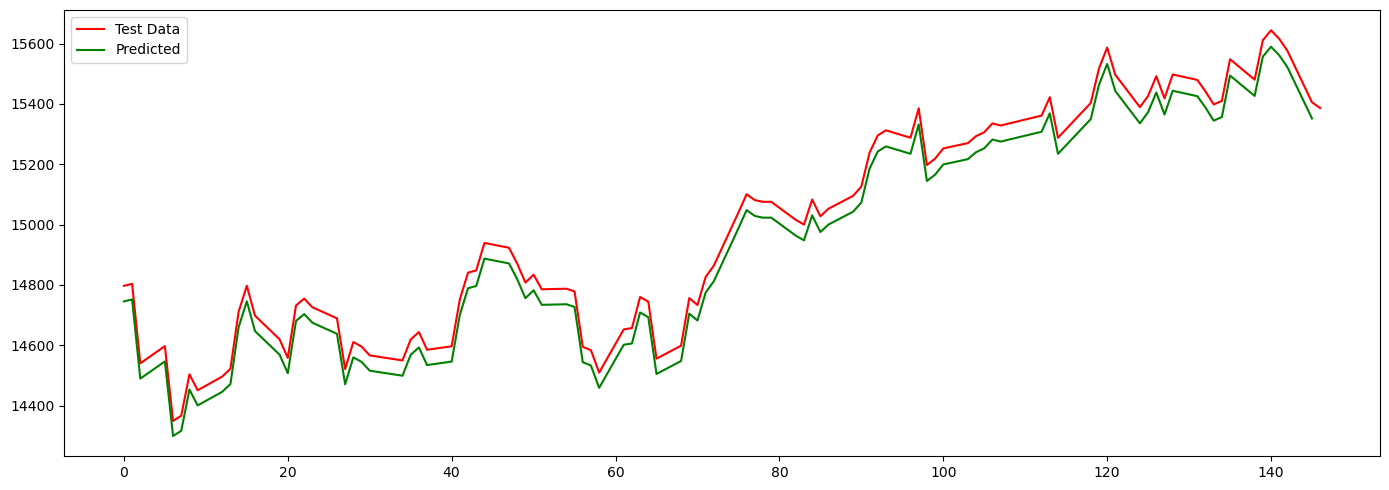

In [125]:
# original scale
plt.figure(figsize=(14,5))
#plt.plot(index, label='Train data')
plt.plot(index[250:], color='red', label='Test Data')
plt.plot(index_predicted, color='green', label='Predicted')
plt.legend(loc='best')
plt.tight_layout()